In [1]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output

from Visualise import Visualise

## Select Dates to Show

In [2]:
# date picker to choose a start date
widg_start = widgets.DatePicker(
                    description='Start Date:',
                    value=pd.datetime.now(),
                    disabled=False
                )

# date picker to choose an end date
widg_end = widgets.DatePicker(
                    description='End Date:',
                    value=pd.datetime.now()+pd.Timedelta('365 days'),
                    disabled=False
                )

freq_dict = {'Monthly':'MS','Weekly':'W-MON','Daily':'D'}

# radio buttons to choose the frequency of dates to display in the table
widg_freq = widgets.RadioButtons(
    options=freq_dict.keys(),
    description='Frequency:',
    disabled=False
)

display(widg_start, widg_end, widg_freq)

DatePicker(value=datetime.datetime(2019, 4, 4, 14, 22, 7, 212040), description='Start Date:')

DatePicker(value=datetime.datetime(2020, 4, 3, 14, 22, 7, 215692), description='End Date:')

RadioButtons(description='Frequency:', options=('Monthly', 'Weekly', 'Daily'), value='Monthly')

## Load Data

In [3]:
vis = Visualise(pd.to_datetime(widg_start.value), 
                pd.to_datetime(widg_end.value), 
                freq_dict[widg_freq.value])

In [4]:
def update_vis_params(change):
    vis.START_DATE = pd.to_datetime(widg_start.value)
    vis.END_DATE = pd.to_datetime(widg_end.value)
    vis.FREQ = freq_dict[widg_freq.value]

widg_start.observe(update_vis_params, names='value')
widg_end.observe(update_vis_params, names='value')
widg_freq.observe(update_vis_params, names='value')

## Rough Equivalents of Martin's Spreadsheet

In [5]:
vis.styled_sheet('person')

In [6]:
vis.styled_sheet('project')

## Show Someone's Project Assignment

Dropdown(description='Person:', options=('Camila Rangel Smith', 'David Beavan', 'Eric Daub', 'Evelina Gabasova…

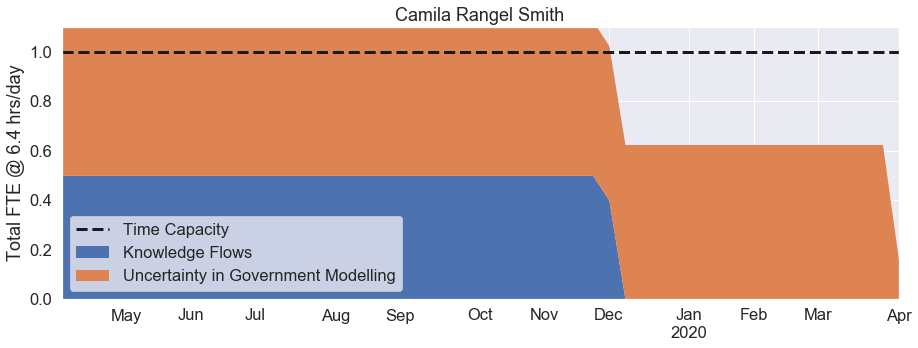

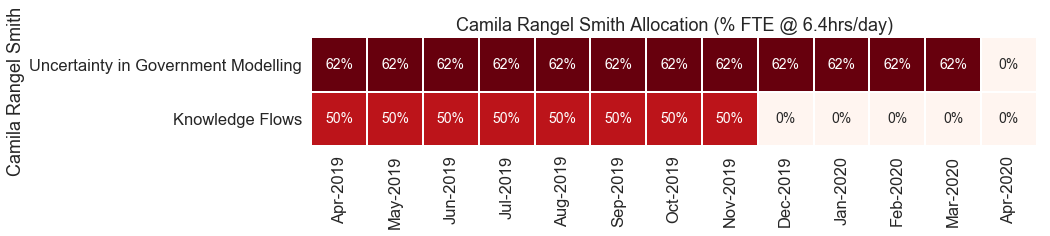

In [7]:
## dropdown list to select a person
widg_person_select = widgets.Dropdown(options=sorted([vis.fc.get_person_name(person_id) for person_id in vis.fc.people.index]),
                                 description='Person:')

def widg_person_select_alloc(change):
    """Function called by widgets to update the person allocation plot and table.
    The change argument isn't used but it's required for widget.observe."""
    
    # clear the previous output, then display the widgets again
    clear_output()
    display(widg_person_select)
    
    # get the person_id from the selected full name (need to first split into first and last names)
    names = widg_person_select.value.split()
    person_id = vis.fc.get_person_id(names[0], ' '.join(names[1:]))
    
    # plot the person allocations
    vis.plot_allocations(person_id, 'person')
    
    # print the person allocations table
    #display(vis.table_allocations(person_id, 'person'))
    vis.heatmap_allocations(person_id, 'person')
    
# setup the event listeners
widg_person_select.observe(widg_person_select_alloc, names='value')

# display the widgets
display(widg_person_select)

# show results with initial values
widg_person_select_alloc(None)

## Show Everyone's Total Project Allocation Over Time

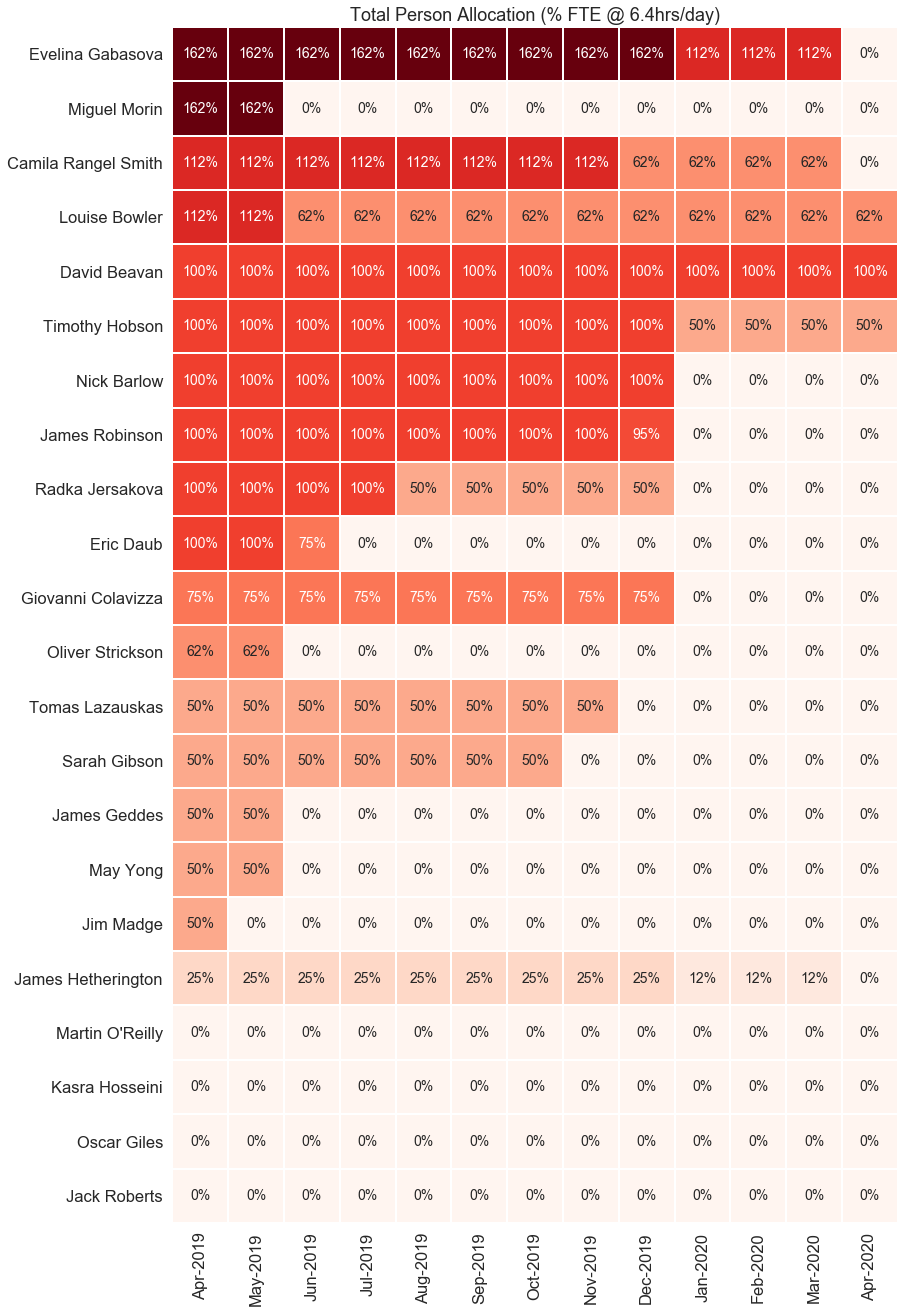

In [8]:
vis.heatmap_allocations('ALL', 'person');

## Show Who's Assigned to a Project

In [9]:
## dropdown list to select a project
widg_project_select = widgets.Dropdown(options=sorted([vis.fc.get_project_name(project_id) for project_id in vis.fc.projects.index]),
                                 description='project:')

def widg_project_select_alloc(change):
    """Function called by widgets to update the project allocation plot and table.
    The change argument isn't used but it's required for widget.observe."""
    
    # clear the previous output, then display the widgets again
    clear_output()
    display(widg_project_select)
    
    # get the project_id from the selected full name (need to first split into first and last names)
    project_id = vis.fc.get_project_id(widg_project_select.value)
    
    # plot the project allocations
    vis.plot_allocations(projecte_id, 'project')
    
    # plot a heatmap of the allocations
    vis.heatmap_allocations(project_id, 'project')

# setup the event listeners
widg_project_select.observe(widg_project_select_alloc, names='value')

# display the widgets
display(widg_project_select)

# show results with initial values
widg_project_select_alloc(None)

Dropdown(description='project:', options=('44 days', 'AI assisted diagnosis of children', 'AI for City Plannin…

No project data to plot for id 1915746 between 2019-04-04 and 2020-04-03
No project data to plot for id 1915746 between 2019-04-04 and 2020-04-03


## Show the Total Resources Required by All Projects

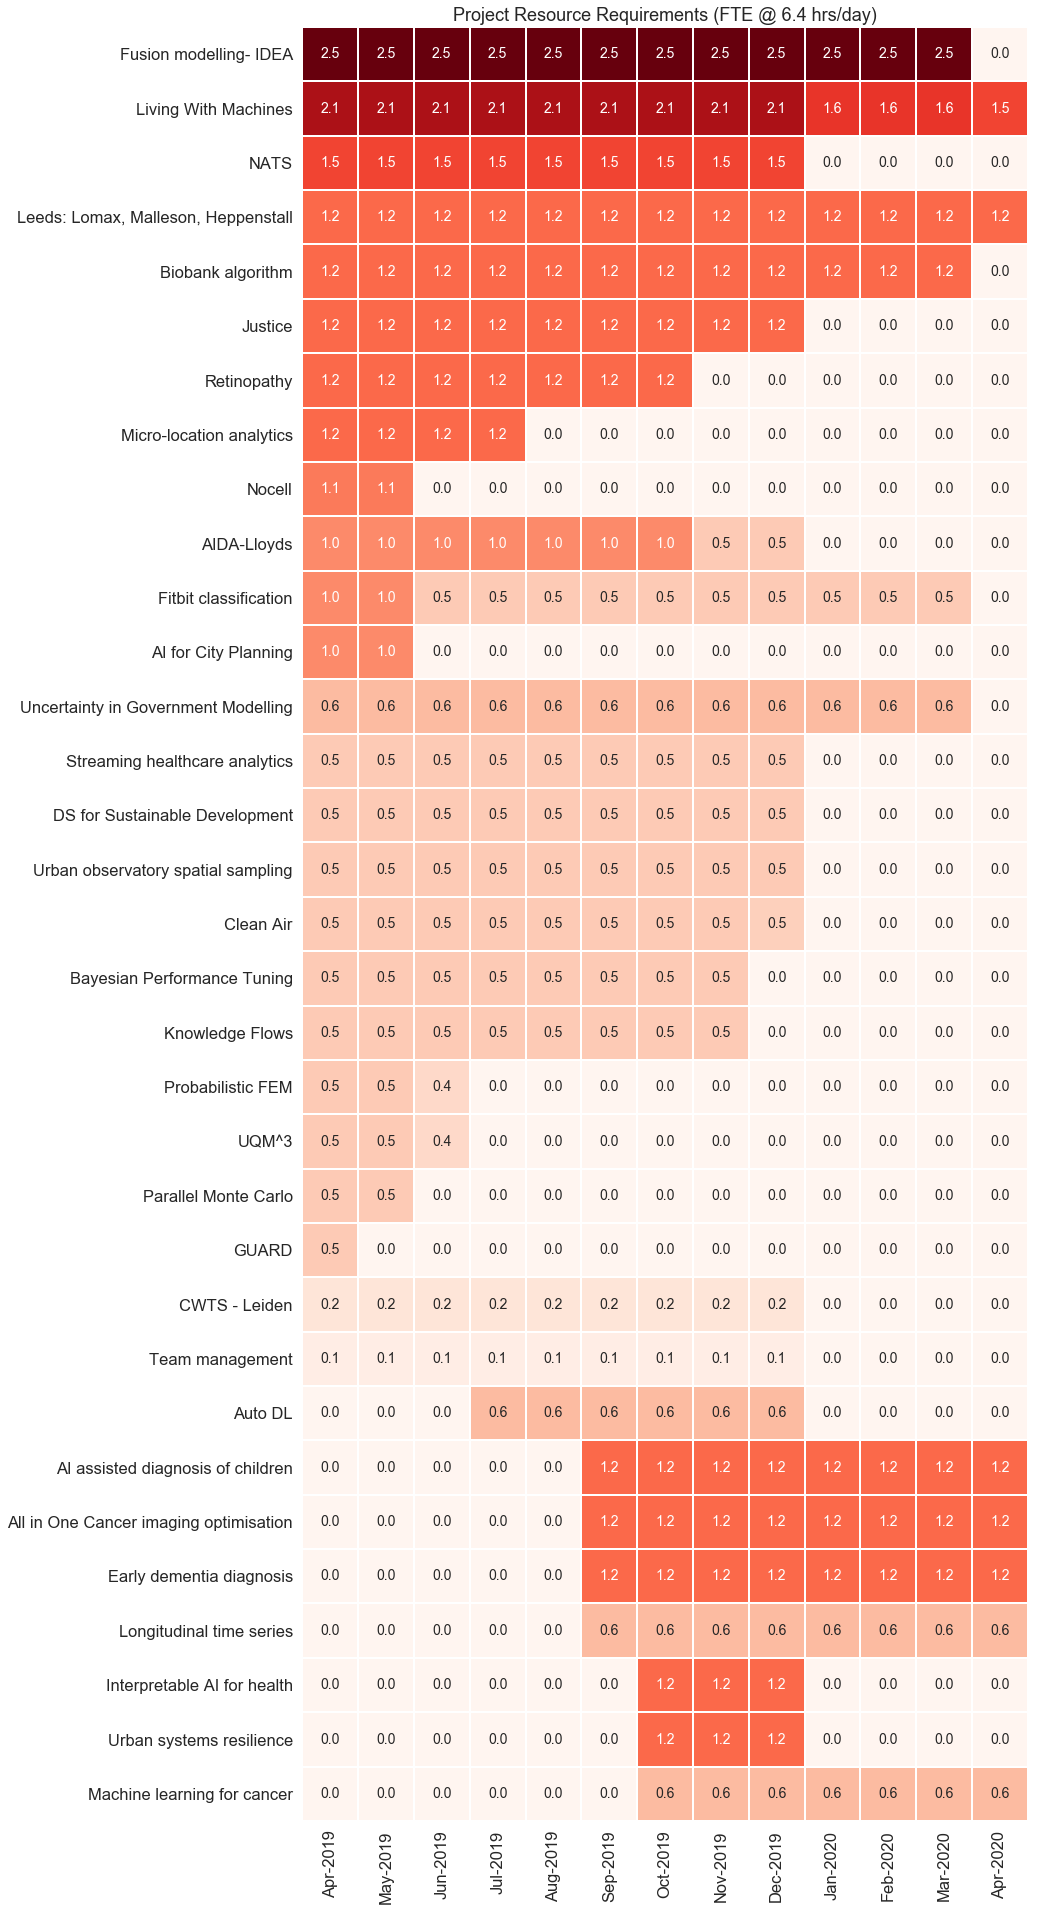

In [10]:
vis.heatmap_allocations('ALL_REQUIREMENTS','project');

## Show the Total Resources Allocated to Each Project

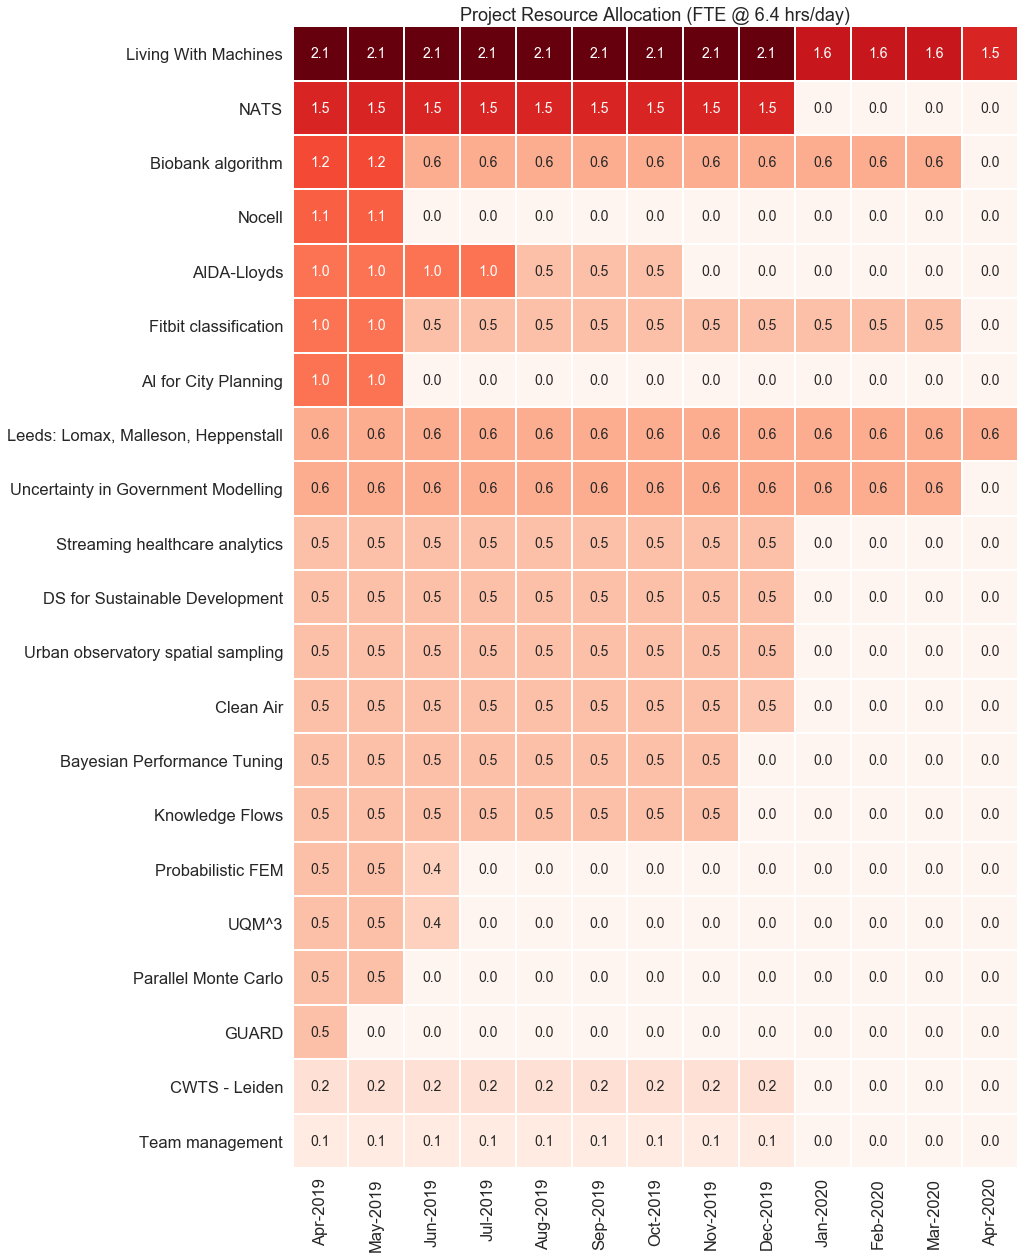

In [11]:
vis.heatmap_allocations('ALL_TOTALS', 'project');

## Show the Additional Resources Needed to be Allocated to Each Project

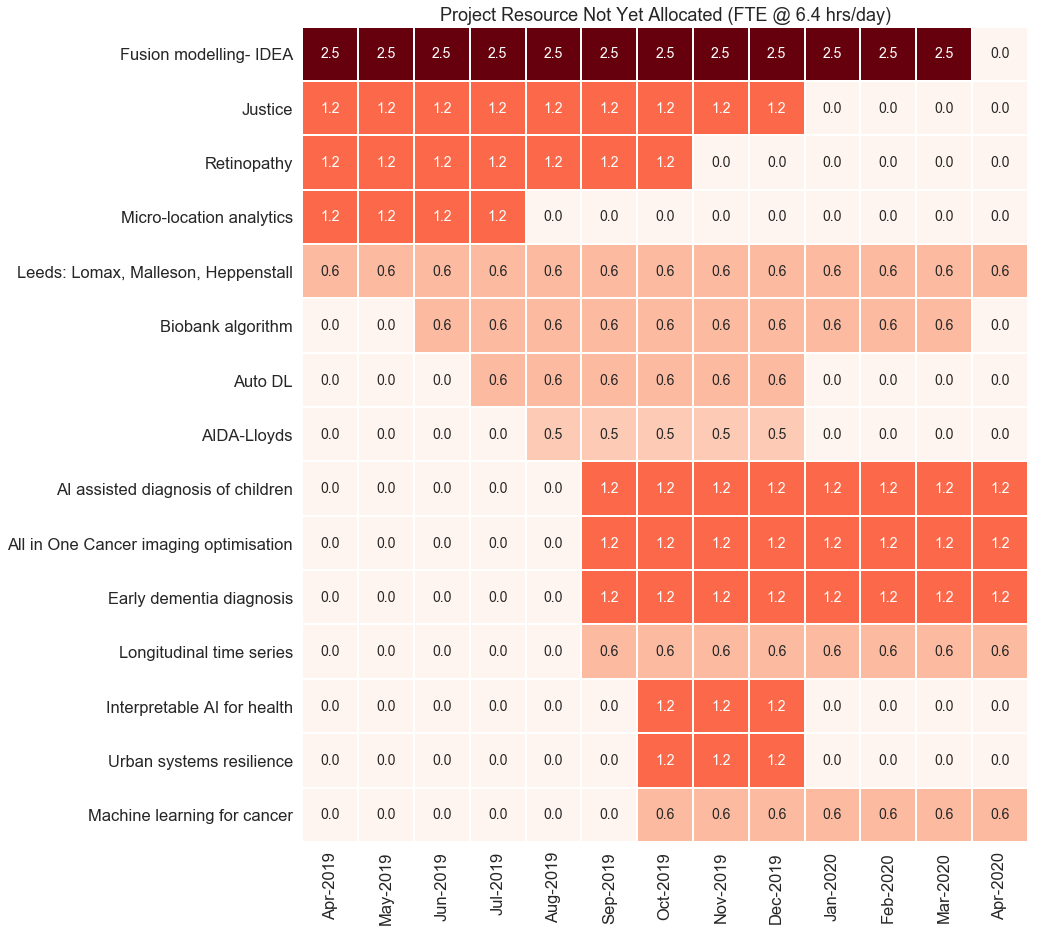

In [12]:
vis.heatmap_allocations('ALL_NETALLOC', 'project');

## Compare the Capcity of the Team to the Requirements of the Projects

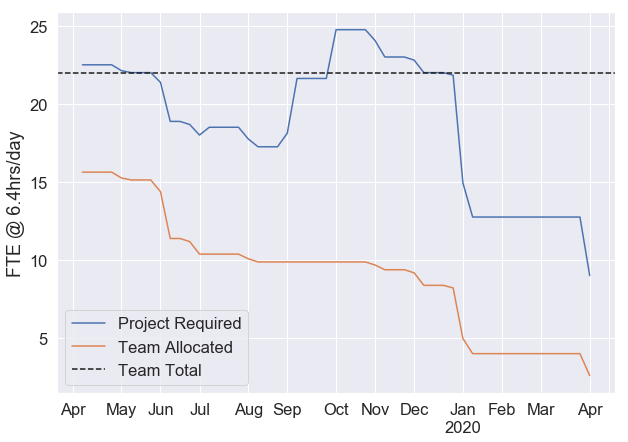

In [13]:
vis.plot_capacity_check();

## Functions for Tables

In [14]:
vis.table_allocations(408184, 'person')

Louise Bowler,AI for City Planning,"Leeds: Lomax, Malleson, Heppenstall",TOTAL
Apr-2019,50%,62%,112%
May-2019,50%,62%,112%
Jun-2019,0%,62%,62%
Jul-2019,0%,62%,62%
Aug-2019,0%,62%,62%
Sep-2019,0%,62%,62%
Oct-2019,0%,62%,62%
Nov-2019,0%,62%,62%
Dec-2019,0%,62%,62%
Jan-2020,0%,62%,62%


In [15]:
vis.table_allocations('ALL','person')

,Camila Rangel Smith,David Beavan,Eric Daub,Evelina Gabasova,Giovanni Colavizza,Jack Roberts,James Geddes,James Hetherington,James Robinson,Jim Madge,Kasra Hosseini,Louise Bowler,Martin O'Reilly,May Yong,Miguel Morin,Nick Barlow,Oliver Strickson,Oscar Giles,Radka Jersakova,Sarah Gibson,Timothy Hobson,Tomas Lazauskas
Apr-2019,112%,100%,100%,162%,75%,0%,50%,25%,100%,50%,0%,112%,0%,50%,162%,100%,62%,0%,100%,50%,100%,50%
May-2019,112%,100%,100%,162%,75%,0%,50%,25%,100%,0%,0%,112%,0%,50%,162%,100%,62%,0%,100%,50%,100%,50%
Jun-2019,112%,100%,75%,162%,75%,0%,0%,25%,100%,0%,0%,62%,0%,0%,0%,100%,0%,0%,100%,50%,100%,50%
Jul-2019,112%,100%,0%,162%,75%,0%,0%,25%,100%,0%,0%,62%,0%,0%,0%,100%,0%,0%,100%,50%,100%,50%
Aug-2019,112%,100%,0%,162%,75%,0%,0%,25%,100%,0%,0%,62%,0%,0%,0%,100%,0%,0%,50%,50%,100%,50%
Sep-2019,112%,100%,0%,162%,75%,0%,0%,25%,100%,0%,0%,62%,0%,0%,0%,100%,0%,0%,50%,50%,100%,50%
Oct-2019,112%,100%,0%,162%,75%,0%,0%,25%,100%,0%,0%,62%,0%,0%,0%,100%,0%,0%,50%,50%,100%,50%
Nov-2019,112%,100%,0%,162%,75%,0%,0%,25%,100%,0%,0%,62%,0%,0%,0%,100%,0%,0%,50%,0%,100%,50%
Dec-2019,62%,100%,0%,162%,75%,0%,0%,25%,95%,0%,0%,62%,0%,0%,0%,100%,0%,0%,50%,0%,100%,0%
Jan-2020,62%,100%,0%,112%,0%,0%,0%,12%,0%,0%,0%,62%,0%,0%,0%,0%,0%,0%,0%,0%,50%,0%


In [16]:
vis.table_allocations(1824197, 'project')

NATS,Evelina Gabasova,Radka Jersakova,Timothy Hobson,UNALLOCATED
Apr-2019,50%,50%,50%,0%
May-2019,50%,50%,50%,0%
Jun-2019,50%,50%,50%,0%
Jul-2019,50%,50%,50%,0%
Aug-2019,50%,50%,50%,0%
Sep-2019,50%,50%,50%,0%
Oct-2019,50%,50%,50%,0%
Nov-2019,50%,50%,50%,0%
Dec-2019,50%,50%,50%,0%
Jan-2020,0%,0%,0%,0%


In [17]:
vis.table_allocations('ALL_TOTALS', 'project')

,AI for City Planning,AIDA-Lloyds,Bayesian Performance Tuning,Biobank algorithm,CWTS - Leiden,Clean Air,DS for Sustainable Development,Fitbit classification,GUARD,Knowledge Flows,"Leeds: Lomax, Malleson, Heppenstall",Living With Machines,NATS,Nocell,Parallel Monte Carlo,Probabilistic FEM,Streaming healthcare analytics,Team management,UQM^3,Uncertainty in Government Modelling,Urban observatory spatial sampling
Apr-2019,100%,100%,50%,125%,25%,50%,50%,100%,50%,50%,62%,212%,150%,112%,50%,50%,50%,12%,50%,62%,50%
May-2019,100%,100%,50%,125%,25%,50%,50%,100%,0%,50%,62%,212%,150%,112%,50%,50%,50%,12%,50%,62%,50%
Jun-2019,0%,100%,50%,62%,25%,50%,50%,50%,0%,50%,62%,212%,150%,0%,0%,38%,50%,12%,38%,62%,50%
Jul-2019,0%,100%,50%,62%,25%,50%,50%,50%,0%,50%,62%,212%,150%,0%,0%,0%,50%,12%,0%,62%,50%
Aug-2019,0%,50%,50%,62%,25%,50%,50%,50%,0%,50%,62%,212%,150%,0%,0%,0%,50%,12%,0%,62%,50%
Sep-2019,0%,50%,50%,62%,25%,50%,50%,50%,0%,50%,62%,212%,150%,0%,0%,0%,50%,12%,0%,62%,50%
Oct-2019,0%,50%,50%,62%,25%,50%,50%,50%,0%,50%,62%,212%,150%,0%,0%,0%,50%,12%,0%,62%,50%
Nov-2019,0%,0%,50%,62%,25%,50%,50%,50%,0%,50%,62%,212%,150%,0%,0%,0%,50%,12%,0%,62%,50%
Dec-2019,0%,0%,0%,62%,25%,45%,50%,50%,0%,0%,62%,212%,150%,0%,0%,0%,50%,12%,0%,62%,50%
Jan-2020,0%,0%,0%,62%,0%,0%,0%,50%,0%,0%,62%,162%,0%,0%,0%,0%,0%,0%,0%,62%,0%


To do:

Include resources from other groups